# EX 1 Serial

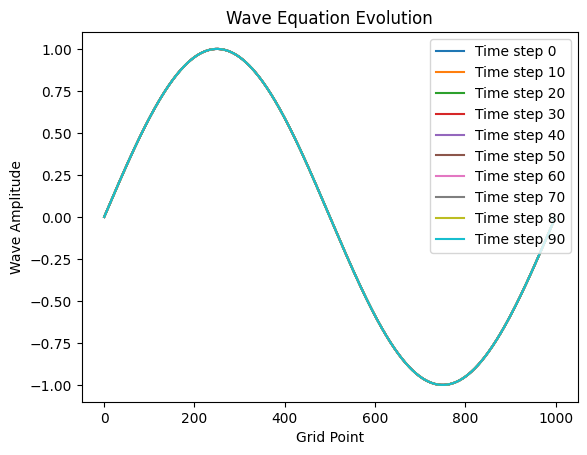

In [11]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory where output files are located
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_1_serial'))

pattern = os.path.join(base_directory, "wave_output_*.txt")
files = glob.glob(pattern)

for file in files:
    data = np.loadtxt(file)
    plt.plot(data, label=f"Time step {file.split('_')[-1].split('.')[0]}")

plt.xlabel("Grid Point")
plt.ylabel("Wave Amplitude")
plt.title("Wave Equation Evolution")
plt.legend()
plt.show()

# EX 1 MPI 

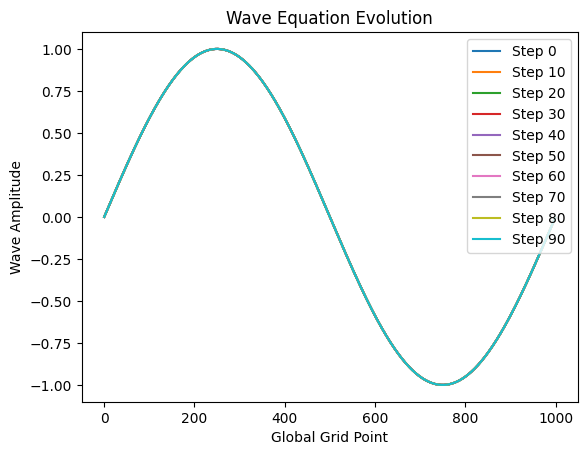

In [10]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory where output files are located
base_directory = os.path.normpath(os.path.join(current_working_directory, 'batch_output', 'ex_1_mpi'))

# Pattern to match files with both step and rank in the filename
pattern = os.path.join(base_directory, "wave_output_step*_rank*.txt")
files = glob.glob(pattern)

# Organize files by time step
data_by_step = {}
for filepath in files:
    fname = os.path.basename(filepath)
    match = re.match(r"wave_output_step(\d+)_rank(\d+)\.txt", fname)
    if match:
        step = int(match.group(1))
        rank = int(match.group(2))
        data_by_step.setdefault(step, []).append((rank, filepath))

# Plot concatenated data for each time step
for step in sorted(data_by_step.keys()):
    # Sort by rank so we concatenate in the correct order
    ranked_files = sorted(data_by_step[step], key=lambda x: x[0])
    # Load and concatenate each rank's output
    arrays = [np.loadtxt(fp) for _, fp in ranked_files]
    full_wave = np.concatenate(arrays)
    plt.plot(full_wave, label=f"Step {step}")

plt.xlabel("Global Grid Point")
plt.ylabel("Wave Amplitude")
plt.title("Wave Equation Evolution")
plt.legend()
plt.show()
